In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FormatStrFormatter

import time

import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import r2_score

import graphviz
import pymc3 as pm
import pandas as pd
import seaborn as sns



from sklearn.datasets import fetch_california_housing


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#task 2.1
fashion_mnist = tf.keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

x_train = train_images /255
y_train = train_labels
x_test = test_images /255
y_test = test_labels



(10000,)


In [3]:
#2.1.1.1
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_train.reshape(x_train.shape[0], 28*28 ))
print(pca.explained_variance_ratio_)


[0.29039228 0.1775531 ]


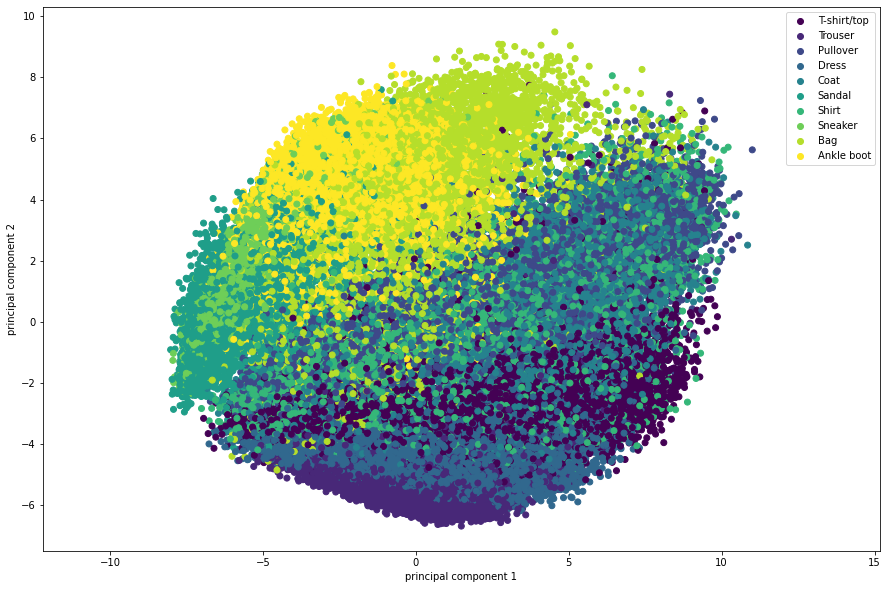

In [4]:
#2.1.1.2
plt.figure(figsize=(15,10))
scatter = plt.scatter(x_pca[:,0], x_pca[:,1], c=y_train)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.axis('equal')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names)
plt.show()

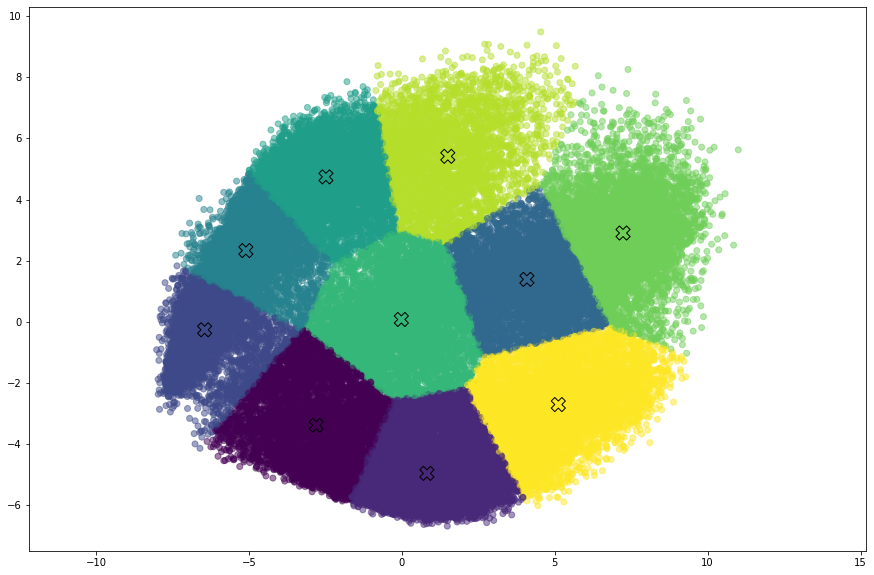

In [5]:
#task 2.1.2.1
K = 10
   
kmeans = KMeans(K, init='random').fit(x_pca)
cluster_assignments = kmeans.predict(x_pca)
centroid_locations = kmeans.cluster_centers_

plt.figure(figsize=(15, 10))
plt.viridis() # Set colour map
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cluster_assignments, alpha=0.5)
plt.scatter(centroid_locations[:, 0], centroid_locations[:, 1], s=200, marker='X', c=range(K), edgecolors='k')

plt.axis('equal')
plt.show()

In [6]:
#2.2.1
train_x_flatten = x_train.reshape(x_train.shape[0], -1)
test_x_flatten = x_test.reshape(x_test.shape[0], -1)
x_train_reduced = train_x_flatten[:10000]
y_train_reduced = y_train[:10000]
x_test_reduced = test_x_flatten[:10000]
y_test_reduced = y_test[:10000]
x_param_train = x_train_reduced[:5000]
y_param_train = y_train_reduced[:5000]
x_param_test = x_test_reduced[:5000]
y_param_test = y_test_reduced[:5000]

C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[Text(0, 0.5, 'training time')]

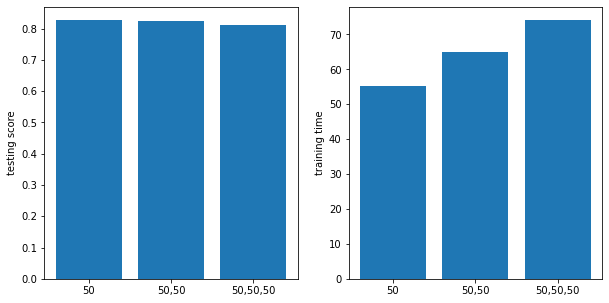

In [30]:
# hyperparameter testing for hidden_layer_sizes
parameters = [(50),(50,50),(50,50,50)]
parameters_name = ['50', '50,50','50,50,50']
x_plot = [1,2,3]
y_time = []
y_performance = []

for param in parameters:
    start = time.time()
    nn = MLPClassifier(hidden_layer_sizes=param,
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
    nn.fit(x_param_train, y_param_train)
    stop = time.time()
    train_time = stop - start
    score = nn.score(x_param_test,y_param_test)
    y_time.append(train_time)
    y_performance.append(score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.bar(parameters_name, y_performance)
ax1.set(ylabel = 'testing score')
ax2.bar(parameters_name, y_time)
ax2.set(ylabel = 'training time')

C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_m

[Text(0, 0.5, 'training time'), Text(0.5, 0, 'alphas')]

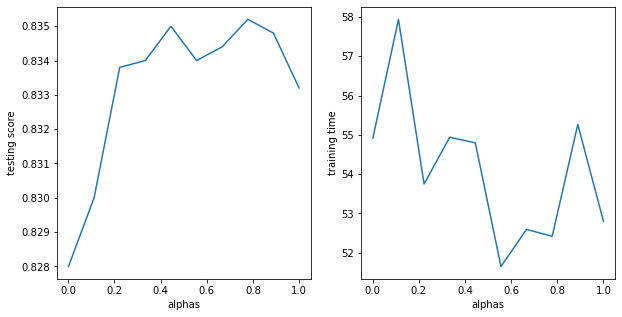

In [139]:
# hyperparameter testing for alphas
parameters = np.linspace(0.001,1,10)
y_time = []
y_performance = []

for param in parameters:
    start = time.time()
    nn = MLPClassifier(hidden_layer_sizes=(50),
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    n_iter_no_change=25,
                    alpha = param,
                    random_state=1)
    nn.fit(x_param_train, y_param_train)
    stop = time.time()
    train_time = stop - start
    score = nn.score(x_param_test,y_param_test)
    y_time.append(train_time)
    y_performance.append(score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(parameters, y_performance)
ax1.set(ylabel = 'testing score', xlabel = 'alphas')

ax2.plot(parameters, y_time)
ax2.set(ylabel = 'training time', xlabel = 'alphas')

C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Harry\anaconda3\lib\site-packages\sklearn\neural_network\_m

[Text(0, 0.5, 'training time'), Text(0.5, 0, 'learning_rate_init')]

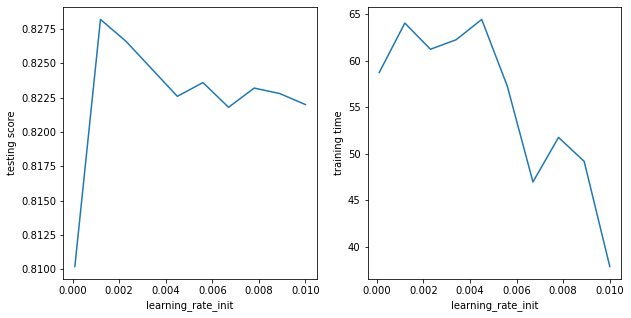

In [24]:
# hyperparameter testing for learning_rate_init
parameters = np.linspace(0.0001,0.01,10)
y_time = []
y_performance = []

for param in parameters:
    start = time.time()
    nn = MLPClassifier(hidden_layer_sizes=(50),
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    n_iter_no_change=25,
                    learning_rate_init = param,
                    random_state=1)
    nn.fit(x_param_train, y_param_train)
    stop = time.time()
    train_time = stop - start
    score = nn.score(x_param_test,y_param_test)
    y_time.append(train_time)
    y_performance.append(score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(parameters, y_performance)
ax1.set(ylabel = 'testing score', xlabel = 'learning_rate_init')

ax2.plot(parameters, y_time)
ax2.set(ylabel = 'training time', xlabel = 'learning_rate_init')

In [25]:
#nn hyperparameter tuning
alphas = np.logspace(-3, -0, 100)
learning_rates = np.logspace(-4, -2, 100)
nn_parameters = {'learning_rate_init':learning_rates, 'alpha':alphas}

nn = MLPClassifier(hidden_layer_sizes=(100),
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)

start = time.time()
nn_cv = RandomizedSearchCV(nn, nn_parameters, scoring='accuracy', n_iter=10, cv=3, verbose=1, n_jobs=-1)
nn_cv.fit(x_train_reduced, y_train_reduced)
stop = time.time()
print(f"Training time: {stop - start}s")
nn_cv.best_params_
# fig, ax = plt.subplots(figsize=(6,4))
# ax.plot(nn_clf.loss_curve_)
# ax.set_xlabel('Number of iterations')
# ax.set_ylabel('Loss')



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training time: 1451.42804813385s


{'learning_rate_init': 0.0037649358067924714, 'alpha': 0.30538555088334157}

[Text(0, 0.5, 'training time')]

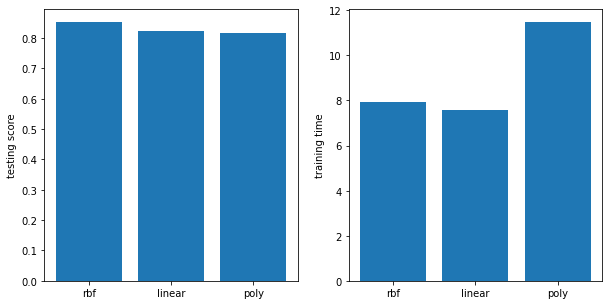

In [29]:
# hyperparemeter testing for kernel
parameters = ['rbf','linear','poly']
y_time = []
y_performance = []

for param in parameters:
    start = time.time()
    svm = SVC(kernel=param)
    svm.fit(x_train_reduced, y_train_reduced)
    stop = time.time()
    train_time = stop - start
    score = svm.score(x_test_reduced,y_test_reduced)
    y_time.append(train_time)
    y_performance.append(score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.bar(parameters, y_performance)
ax1.set(ylabel = 'testing score')

ax2.bar(parameters, y_time)
ax2.set(ylabel = 'training time')

[Text(0, 0.5, 'training time'), Text(0.5, 0, 'C')]

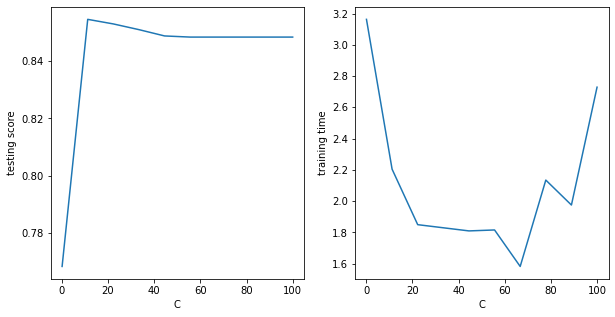

In [33]:
# hyperparemeter testing for C
parameters = np.linspace(0.1,100,10)
y_time = []
y_performance = []

for param in parameters:
    start = time.time()
    svm = SVC(C=param)
    svm.fit(x_param_train, y_param_train)
    stop = time.time()
    train_time = stop - start
    score = svm.score(x_param_test,y_param_test)
    y_time.append(train_time)
    y_performance.append(score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(parameters, y_performance)
ax1.set(ylabel = 'testing score', xlabel = 'C')

ax2.plot(parameters, y_time)
ax2.set(ylabel = 'training time', xlabel = 'C')

[Text(0, 0.5, 'training time'), Text(0.5, 0, 'gamma')]

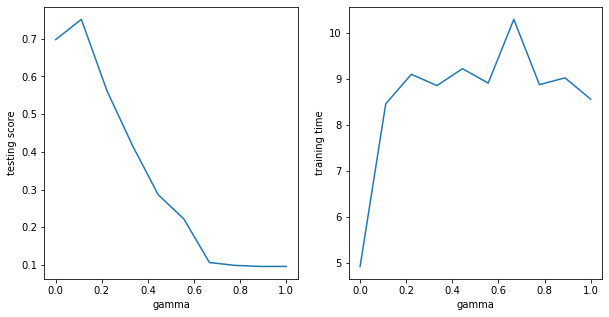

In [35]:
# hyperparemeter testing for gamma
parameters = np.linspace(0.0001,1,10)
y_time = []
y_performance = []

for param in parameters:
    start = time.time()
    svm = SVC(gamma=param)
    svm.fit(x_param_train, y_param_train)
    stop = time.time()
    train_time = stop - start
    score = svm.score(x_param_test,y_param_test)
    y_time.append(train_time)
    y_performance.append(score)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(parameters, y_performance)
ax1.set(ylabel = 'testing score', xlabel = 'gamma')

ax2.plot(parameters, y_time)
ax2.set(ylabel = 'training time', xlabel = 'gamma')

In [36]:
#task 2.2.2
C = np.linspace(0.1,100,100)
gamma =  np.linspace(0.0001,1,100)
svm_parameters = {'C':C, 'gamma':gamma}
# svm_parameters = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
svm = SVC(kernel='rbf')
start = time.time()
svm_cv = RandomizedSearchCV(svm, svm_parameters, scoring='accuracy', n_iter=10, cv=3, verbose=1)
svm_cv.fit(x_train_reduced, y_train_reduced)
stop = time.time()
print(f"Training time: {stop - start}s")
svm_cv.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Training time: 946.5224771499634s


{'gamma': 0.0304, 'C': 56.60909090909091}

In [37]:

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, "o-")
    axes[2].fill_between(
        fit_times_mean,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Harry\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

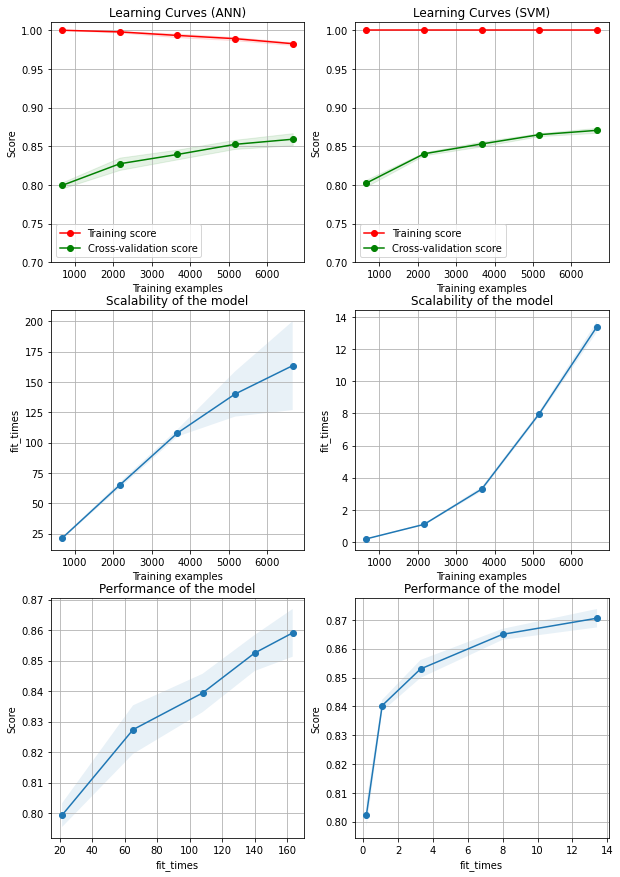

In [38]:
#plot training and validation learning curve
k_fold = KFold(n_splits = 3, shuffle = True, random_state = 1)
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

nn_title = "Learning Curves (ANN)"
nn_clf = MLPClassifier(hidden_layer_sizes=(100),
                    activation='relu',
                    solver='sgd',
                    alpha=nn_cv.best_params_['alpha'],
                    learning_rate_init=nn_cv.best_params_['learning_rate_init'],
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)
plot_learning_curve(nn_clf, nn_title, x_train_reduced, y_train_reduced, axes=axes[:,0], ylim=(0.7, 1.01), cv=k_fold, n_jobs=4)

svm_title = "Learning Curves (SVM)"
svm_clf = SVC(kernel='rbf', gamma = svm_cv.best_params_['gamma'], C =svm_cv.best_params_['C'])
plot_learning_curve(svm_clf, svm_title, x_train_reduced, y_train_reduced, axes=axes[:,1], ylim=(0.7, 1.01), cv=k_fold, n_jobs=4)


Training time: 136.381338596344s
Training score:  0.9754
Testing score:  0.8551


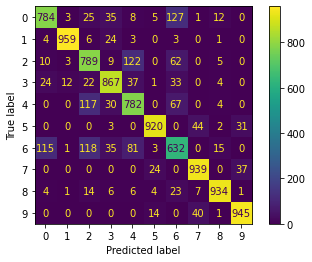

In [129]:
nn_clf = MLPClassifier(hidden_layer_sizes=(100),
                    activation='relu',
                    solver='sgd',
                    alpha=0.30538555088334157,
                    learning_rate_init=0.0037649358067924714,
                    max_iter=1000,
                    n_iter_no_change=25,
                    random_state=1)

start = time.time()
nn_clf.fit(x_train_reduced,y_train_reduced)
stop = time.time()
print(f"Training time: {stop - start}s")
print("Training score: ", nn_clf.score(x_train_reduced, y_train_reduced))
print("Testing score: ", nn_clf.score(x_test_reduced, y_test_reduced))
plot_confusion_matrix(nn_clf,x_test_reduced,y_test_reduced)

Training time: 16.05610466003418s
Training score:  1.0
Testing score:  0.8687


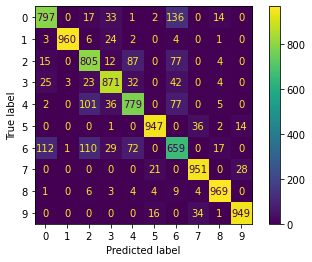

In [130]:
svm_clf = SVC(kernel='rbf', gamma =  0.0304, C =56.60909090909091)

start = time.time()
svm_clf.fit(x_train_reduced,y_train_reduced)
stop = time.time()
print(f"Training time: {stop - start}s")
print("Training score: ", svm_clf.score(x_train_reduced, y_train_reduced))
print("Testing score: ", svm_clf.score(x_test_reduced, y_test_reduced))
plot_confusion_matrix(svm_clf,x_test_reduced,y_test_reduced)

In [43]:
names = ["Neural Net", "RBF SVM"]
classifiers = [nn_clf,svm_clf]

X = x_train_reduced
y = y_train_reduced
pca = PCA(n_components=2)
X = pca.fit_transform(X)


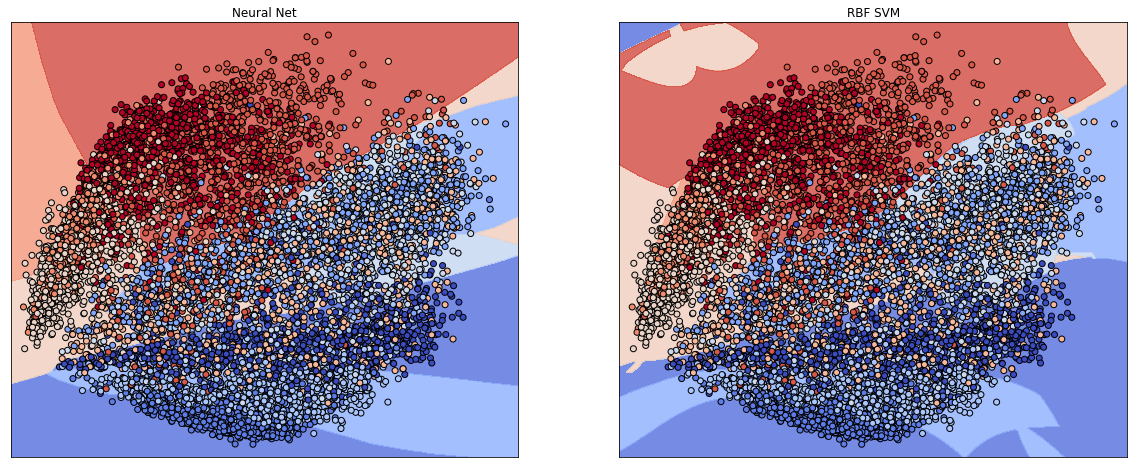

In [44]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


plt.figure(figsize=(20, 8))
for i, clf in enumerate(classifiers):
    plt.subplot(1, len(classifiers), i+1)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor = "k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(names[i])

In [40]:
#task 2.3
california_housing = fetch_california_housing(as_frame=True)
feature_names =  california_housing.feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

No handles with labels found to put in legend.


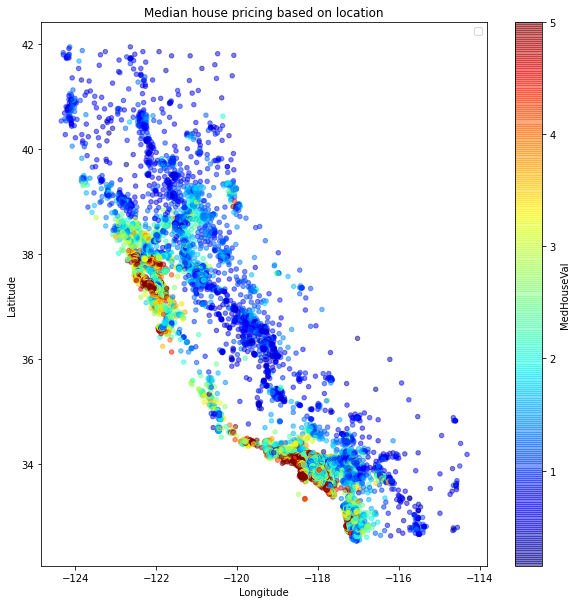

In [41]:
# 2.3.1
california_housing.frame.plot(kind="scatter", x="Longitude", y="Latitude", c="MedHouseVal", alpha=0.5,
                              figsize=(10,10), cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
plt.legend()
plt.title("Median house pricing based on location")
plt.show()

In [45]:
#2.3.2
california_housing_shuffled = california_housing.frame.sample(frac=1,random_state = 1)
x = california_housing_shuffled.iloc[:,:-1].to_numpy()
y = california_housing_shuffled.iloc[:,-1:].to_numpy()
scaler = StandardScaler()
# df_x = scaler.fit_transform(df_x)
x = scaler.fit_transform(x)
y = y.reshape(y.shape[0])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
df_x = pd.DataFrame(x, columns=feature_names)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.326708,0.823227,-0.374193,-0.048443,-0.279466,-0.124537,-0.735924,0.603801
1,-0.996050,0.664310,-0.178009,-0.122098,-0.249442,-0.044394,0.537543,-0.104965
2,0.075024,1.379433,-0.383452,-0.178012,0.095832,0.068138,0.982320,-1.422670
3,-1.236920,1.856182,-0.614747,0.038547,-1.082161,-0.074313,1.019775,-1.352792
4,0.688939,0.664310,-0.009150,-0.151805,-0.630921,-0.053755,-0.848289,0.718601


In [13]:
#2.3.3
# formula = 'MedHouseVal ~ MedInc + HouseAge + AveRooms + AveBedrms + Population + AveOccup + Latitude + Longitude'
def bayseian_linear_regression(x,y):
    num_samples = 1000

    with pm.Model() as model:
        intercept = pm.Normal('intercept', mu=0, sd=20)
        coefficient1 = pm.Normal('MedInc', mu=0, sd=20)
        coefficient2 = pm.Normal('HouseAge', mu=0, sd=20)
        coefficient3 = pm.Normal('AveRooms', mu=0, sd=20)
        coefficient4 = pm.Normal('AveBedrms', mu=0, sd=20)
        coefficient5 = pm.Normal('Population', mu=0, sd=20)
        coefficient6 = pm.Normal('AveOccup', mu=0, sd=20)
        coefficient7 = pm.Normal('Latitude', mu=0, sd=20)
        coefficient8 = pm.Normal('Longitude', mu=0, sd=20)
        sigma = pm.Exponential('sigma', 1)
        y_est = intercept + coefficient1*x[:,0] + coefficient2*x[:,1] + coefficient3*x[:,2] + coefficient4*x[:,3] + coefficient5*x[:,4] + coefficient6*x[:,5] + coefficient7*x[:,6] + coefficient8*x[:,7]
        likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)
        sampler = pm.NUTS()

        trace = pm.sample(num_samples, sampler, progressbar=True)
    return trace


start = time.time()
trace = bayseian_linear_regression(x,y)
stop = time.time()
bayesian_linear_regression_time = stop - start
print(f"Training time: {bayesian_linear_regression_time}s")

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Longitude, Latitude, AveOccup, Population, AveBedrms, AveRooms, HouseAge, MedInc, intercept]
Sampling 4 chains, 0 divergences: 100%|█████████████████████████████████████████| 6000/6000 [01:18<00:00, 76.73draws/s]
The acceptance probability does not match the target. It is 0.8787127904321896, but should be close to 0.8. Try to increase the number of tuning steps.


Training time: 111.48501586914062s


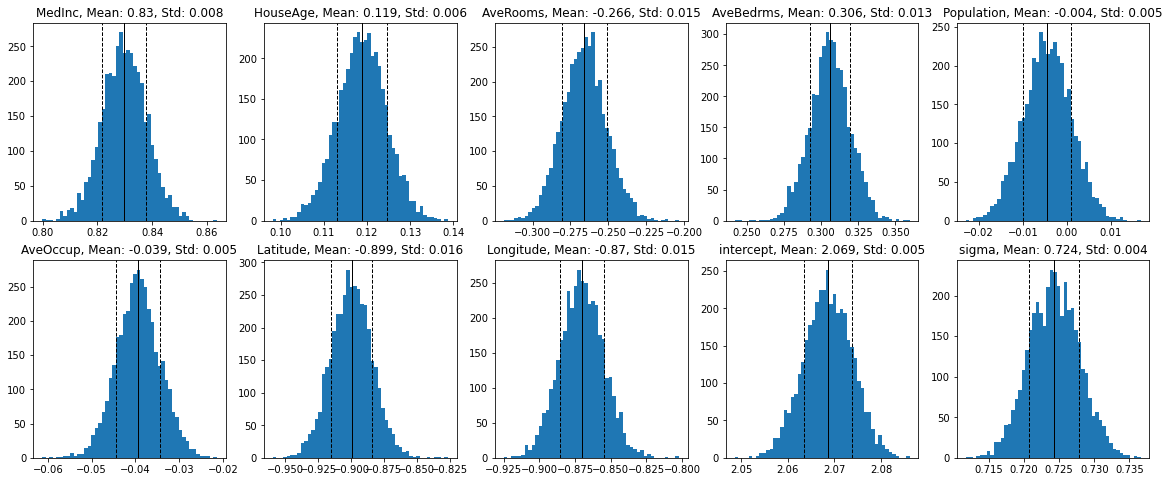

In [41]:
def plot_posterior_distributions(trace):
    fig, axs = plt.subplots(2, 5,figsize=(20, 8))
    var = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','intercept','sigma']
    for count, name in enumerate(var):
        if count < 5:
            row = 0
        else:
            row = 1
        graph_index = count % 5
        mean = trace[name].mean()
        std = trace[name].std()
        axs[row,graph_index].hist(trace[name], 50, histtype='stepfilled')
        axs[row,graph_index].axvline(mean, color='k', linewidth=1)
        axs[row,graph_index].axvline(mean - std, color='k', linestyle='dashed', linewidth=1)
        axs[row,graph_index].axvline(mean + std, color='k', linestyle='dashed', linewidth=1)
        axs[row,graph_index].set_title('%s, Mean: %s, Std: %s' %(name, round(mean,3),round(std,3)))
plot_posterior_distributions(trace)

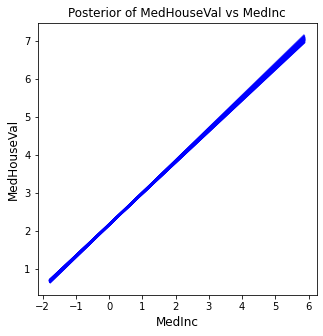

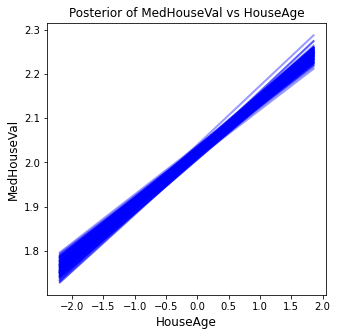

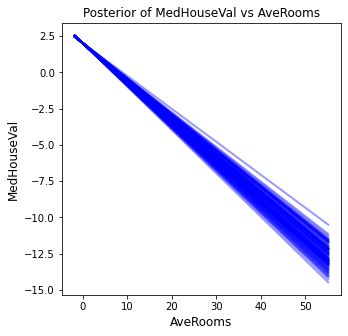

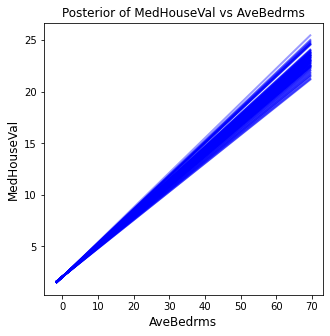

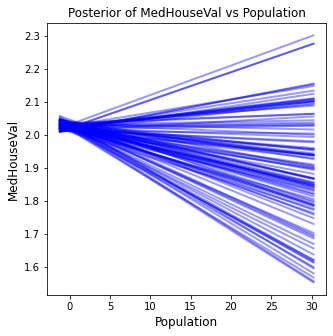

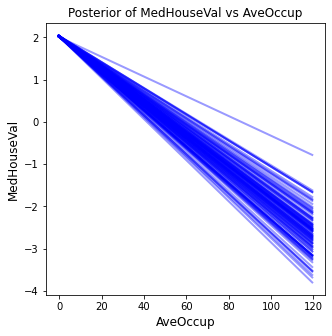

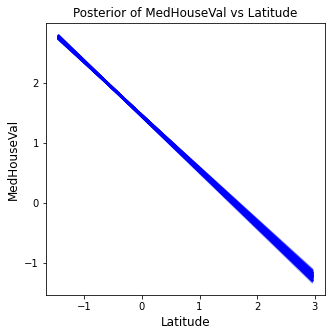

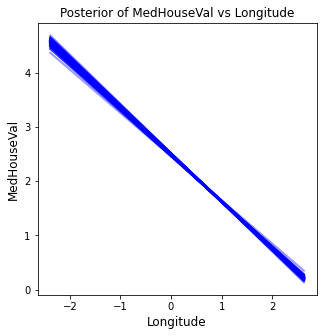

In [126]:
def model_effect(query_var, trace, X):
    coefficient_name = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
    # Variables that do not change
    steady_vars = coefficient_name
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    plt.figure(figsize = (5, 5))
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 12)
    plt.ylabel('MedHouseVal', size = 12)
    plt.title("Posterior of MedHouseVal vs %s" % query_var, size = 12)
    plt.show()
for var in feature_names:
    model_effect(var,trace,df_x)


In [48]:
# random sample 50
california_housing_shuffled = california_housing.frame.sample(frac=1,random_state = 2)
x_50 = california_housing_shuffled.iloc[:50,:-1].to_numpy()
y_50 = california_housing_shuffled.iloc[:50,-1:].to_numpy()
# df. isnull(). sum() 
scaler = StandardScaler()
x_50 = scaler.fit_transform(x_50)
y_50 = y_50.reshape(y_50.shape[0])


(50,)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Longitude, Latitude, AveOccup, Population, AveBedrms, AveRooms, HouseAge, MedInc, intercept]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 6000/6000 [00:09<00:00, 659.33draws/s]


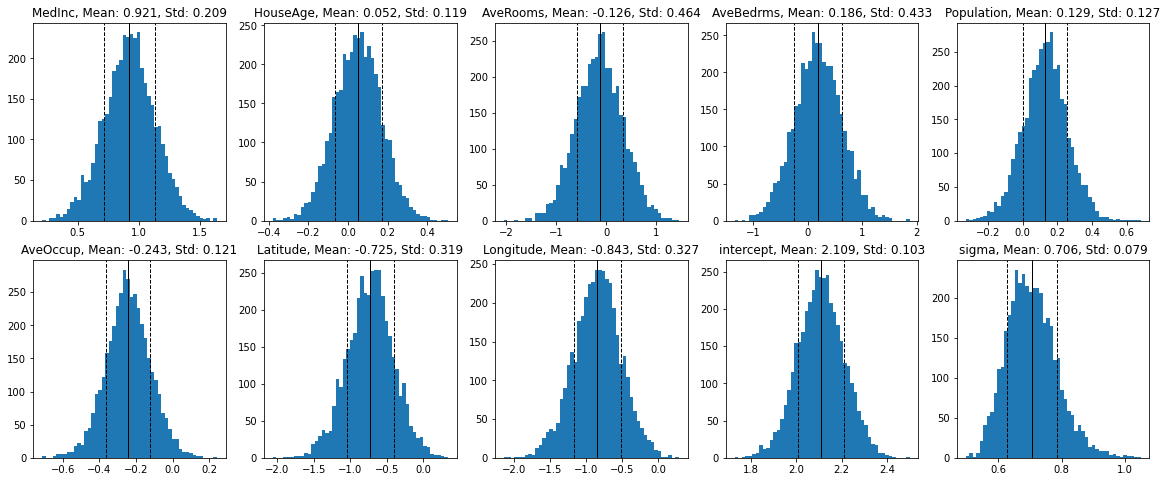

In [49]:
trace_50 = bayseian_linear_regression(x_50,y_50)
plot_posterior_distributions(trace_50)

In [50]:
# random sample 500
california_housing_shuffled = california_housing.frame.sample(frac=1,random_state = 3)
x_500 = california_housing_shuffled.iloc[:500,:-1].to_numpy()
y_500 = california_housing_shuffled.iloc[:500,-1:].to_numpy()
# df. isnull(). sum() 
scaler = StandardScaler()
x_500 = scaler.fit_transform(x_500)
y_500 = y_500.reshape(y_500.shape[0])


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Longitude, Latitude, AveOccup, Population, AveBedrms, AveRooms, HouseAge, MedInc, intercept]
Sampling 4 chains, 0 divergences: 100%|████████████████████████████████████████| 6000/6000 [00:09<00:00, 608.27draws/s]


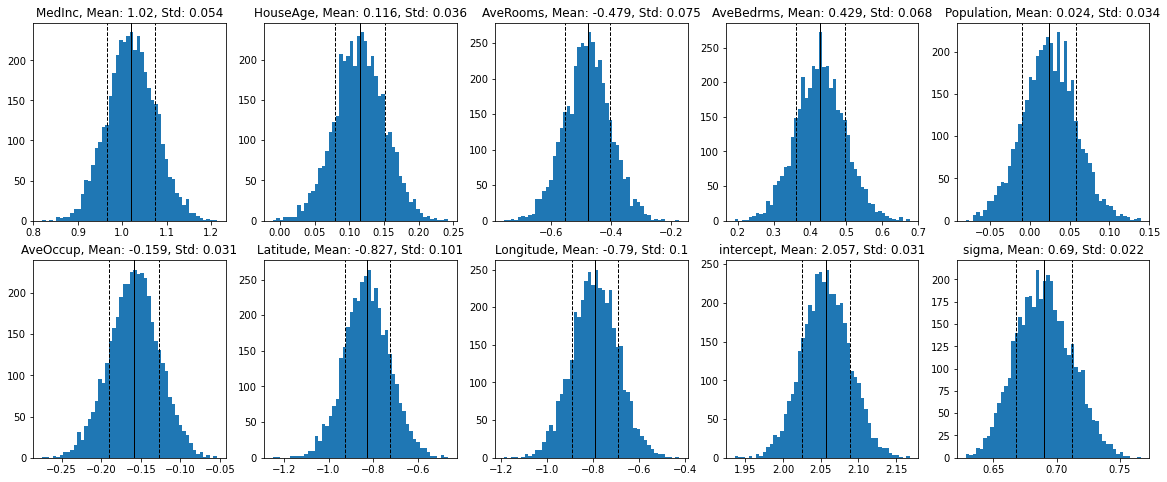

In [51]:
trace_500 = bayseian_linear_regression(x_500,y_500)
plot_posterior_distributions(trace_500)

In [14]:
coefficient1 = trace['MedInc'].mean()
coefficient2 = trace['HouseAge'].mean()
coefficient3 = trace['AveRooms'].mean()
coefficient4 = trace['AveBedrms'].mean()
coefficient5 = trace['Population'].mean()
coefficient6 = trace['AveOccup'].mean()
coefficient7 = trace['Latitude'].mean()
coefficient8 = trace['Longitude'].mean()
intercept = trace['intercept'].mean()
y_pred = coefficient1 * X_test[:,0] + coefficient2 * X_test[:,1] + coefficient3 * X_test[:,2] + coefficient4 * X_test[:,3] + coefficient5 * X_test[:,4] + coefficient6 * X_test[:,5] + coefficient7 * X_test[:,6] + coefficient8 * X_test[:,7] + intercept
bayesian_linear_regression_score = r2_score(y_test, y_pred) 
print("Testing score: ", bayesian_linear_regression_score)


Testing score:  0.6109951973373472


In [19]:
# task 2.4.1
x = range(2,100)
y_performance1 = []
y_performance2 = []
y_performance3 = []
y_time1 = []
y_time2 = []
y_time3 = []
for i in x:
    start = time.time()
    decision_tree1 = DecisionTreeRegressor(max_depth=i, random_state=1)
    decision_tree1.fit(X_train, y_train)
    stop = time.time()
    train_time = stop - start
    y_time1.append(train_time)
    score1 = decision_tree1.score(X_test,y_test)
    y_performance1.append(score1)
    
    start = time.time()
    decision_tree2 = DecisionTreeRegressor(min_samples_split=i, random_state=1)
    decision_tree2.fit(X_train, y_train)
    stop = time.time()
    train_time = stop - start
    y_time2.append(train_time)
    score2 = decision_tree2.score(X_test,y_test)
    y_performance2.append(score2)
    
    start = time.time()
    decision_tree3 = DecisionTreeRegressor(min_samples_leaf=i, random_state=1)
    decision_tree3.fit(X_train, y_train)
    stop = time.time()
    train_time = stop - start
    y_time3.append(train_time)
    score3 = decision_tree3.score(X_test,y_test)
    y_performance3.append(score3)


[Text(0, 0.5, 'training time'), Text(0.5, 0, 'parameter_value')]

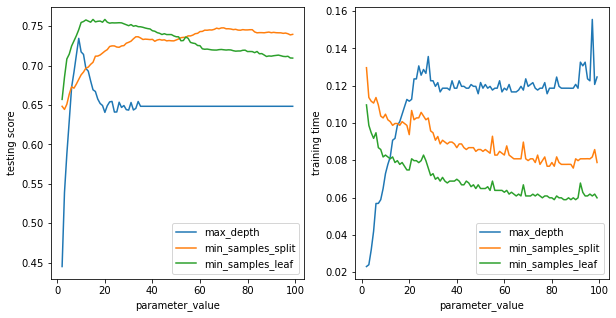

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(x, y_performance1, label = 'max_depth')
ax1.plot(x, y_performance2, label = 'min_samples_split')
ax1.plot(x, y_performance3, label = 'min_samples_leaf')
ax1.set(ylabel = 'testing score', xlabel = 'parameter_value')
ax1.legend()

ax2.plot(x, y_time1, label = 'max_depth')
ax2.plot(x, y_time2, label = 'min_samples_split')
ax2.plot(x, y_time3, label = 'min_samples_leaf')
ax2.legend()
ax2.set(ylabel = 'training time', xlabel = 'parameter_value')

In [164]:
#task 2.4.1
parameters={
    "max_depth": range(1,20),
    "min_samples_split":range(2,20),
    "min_samples_leaf":range(1,20),
}
decision_tree = DecisionTreeRegressor( random_state=1)
start = time.time()
decision_tree_cv = RandomizedSearchCV(decision_tree, parameters, n_iter=100, cv=3, verbose=1, n_jobs=-1)
# decision_tree_cv = GridSearchCV(decision_tree,parameters, cv=3, verbose=1)
decision_tree_cv.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
decision_tree_cv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Training time: 5.300041437149048s


{'min_samples_split': 8, 'min_samples_leaf': 13, 'max_depth': 16}

In [43]:
start = time.time()
decision_tree = DecisionTreeRegressor(min_samples_leaf = 13, min_samples_split=8,max_depth=16, random_state=1)
decision_tree.fit(X_train, y_train)
stop = time.time()
decision_tree_score = decision_tree.score(X_test,y_test)
decision_tree_time = stop - start
# print("Training score: ", decision_tree.score(X_train,y_train))
print("Testing score: ", decision_tree.score(X_test,y_test))
print(f"Training time: {decision_tree_time}s")

Testing score:  0.7569311684014688
Training time: 0.0897982120513916s


In [47]:
importance = decision_tree.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.58028
Feature: 1, Score: 0.04844
Feature: 2, Score: 0.01354
Feature: 3, Score: 0.00883
Feature: 4, Score: 0.00899
Feature: 5, Score: 0.13711
Feature: 6, Score: 0.10566
Feature: 7, Score: 0.09715


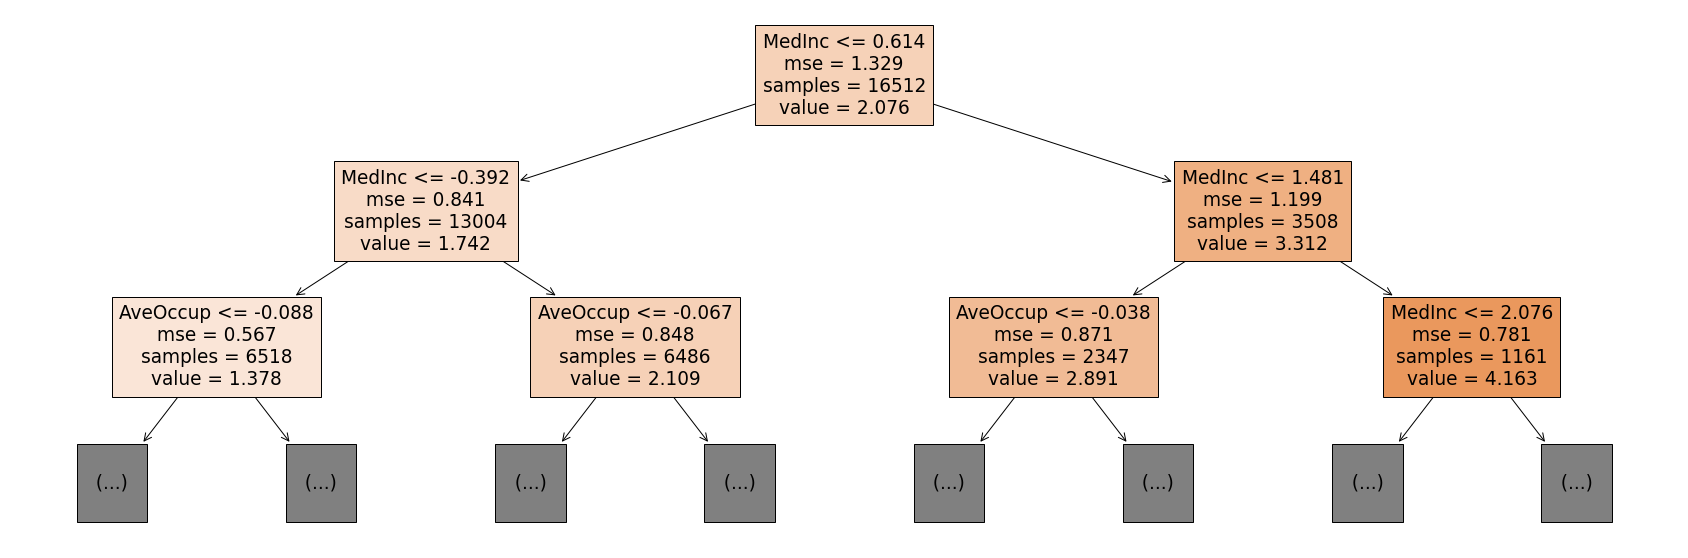

In [67]:
fig = plt.figure(figsize=(30,10))
_ = tree.plot_tree(decision_tree,
                   max_depth=2,
                   feature_names=feature_names,  
                   filled=True)
# dot_data = tree.export_graphviz(decision_tree, 
#                   feature_names=feature_names,  
#                   filled=True, rounded=True,  
#                   special_characters=True,
#                    out_file=None,
#                            )
# graph = graphviz.Source(dot_data)
# graph.format = "png"
# graph.render("tree_graph")
# graph

[Text(0, 0.5, 'training time'), Text(0.5, 0, 'n_estimators')]

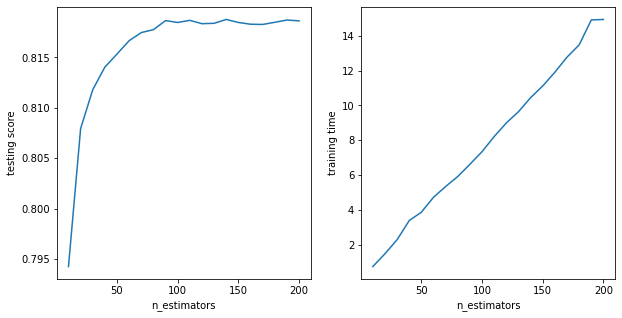

In [35]:
#2.4.2
x = np.arange(10,210,10)
y_performance = []
y_time = []
for i in x:
    start = time.time()
    random_forest = RandomForestRegressor(n_estimators=i,random_state=1)
    random_forest.fit(X_train,y_train)
    stop = time.time()
    train_time = stop - start
    score = random_forest.score(X_test,y_test)
    y_performance.append(score)
    y_time.append(train_time)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.plot(x, y_performance)
ax1.set(ylabel = 'testing score', xlabel = 'n_estimators')

ax2.plot(x, y_time)
ax2.set(ylabel = 'training time', xlabel = 'n_estimators')


In [39]:
start = time.time()
random_forest = RandomForestRegressor(n_estimators=100, random_state=1)
random_forest.fit(X_train,y_train)
stop = time.time()
random_forest_score = random_forest.score(X_test,y_test)
random_forest_time = stop - start
# print("Training score: ", random_forest.score(X_train,y_train))
print("Testing score: ", random_forest.score(X_test,y_test))
print(f"Training time: {random_forest_time}s")

Testing score:  0.8184728143990645
Training time: 7.40423321723938s


## Code References 
* [Plotting Learning Curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html)
* [Bayesian Linear Regression in Python: Using Machine Learning to Predict Student Grades Part 2](https://towardsdatascience.com/bayesian-linear-regression-in-python-using-machine-learning-to-predict-student-grades-part-2-b72059a8ac7e)
